In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [190]:
df=pd.read_csv('Avocado_1518.csv')
df 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [191]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [193]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [194]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [195]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [196]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte,9,25


In [197]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()
df['type']=pd.DataFrame(lb.fit_transform(df['type']))
df['region']=pd.DataFrame(lb.fit_transform(df['region'])) 
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10,16
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,9,10
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,2,10
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,9,25


In [198]:
df1=df.drop('Date',axis=1)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7,9,25


In [199]:
df1.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [200]:
import numpy as np                                            # Removing Skewness 
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [201]:
df1.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [202]:
import numpy as np                                            # Removing Skewness little further
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(np.log1p(df1[col]))

In [203]:
df1.skew()

AveragePrice   -0.109444
Total Volume    0.383704
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.274385
Small Bags      0.323187
Large Bags     -0.912766
XLarge Bags     0.227093
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [204]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,1.250117,6.944801,10.905146,3.895080,1.196840,1.196517,4.545951,0.000000,0,1.148289,0,12,27
1,1.35,1.246348,6.515127,10.706381,4.083115,1.199493,1.199187,4.589955,0.000000,0,1.148289,0,12,20
2,0.93,1.264141,6.679222,11.600485,4.879007,1.194867,1.194481,4.645736,0.000000,0,1.148289,0,12,13
3,1.08,1.254971,7.032624,11.184108,4.298373,1.184420,1.183682,4.903495,0.000000,0,1.148289,0,6,12
4,1.28,1.244591,6.848515,10.688288,4.340944,1.186379,1.185358,5.291746,0.000000,0,1.148289,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,1.274559,10.960064,10.939651,9.771828,1.248259,1.243509,9.245288,1.054186,0,1.148307,7,10,16
1513,1.51,1.273102,10.676528,10.862658,9.874088,1.249768,1.246272,9.059234,0.000000,0,1.148307,7,9,10
1514,1.48,1.273123,10.744316,10.876052,9.725432,1.249434,1.245658,9.019078,1.112966,0,1.148307,7,2,10
1515,1.47,1.274367,10.898807,10.889203,9.769752,1.250004,1.246687,9.021509,0.000000,0,1.148307,7,9,25


In [205]:
print(df1['type'].unique())       

[0]


In [206]:
collist=df1.columns.values
ncol=16
nrows=10 

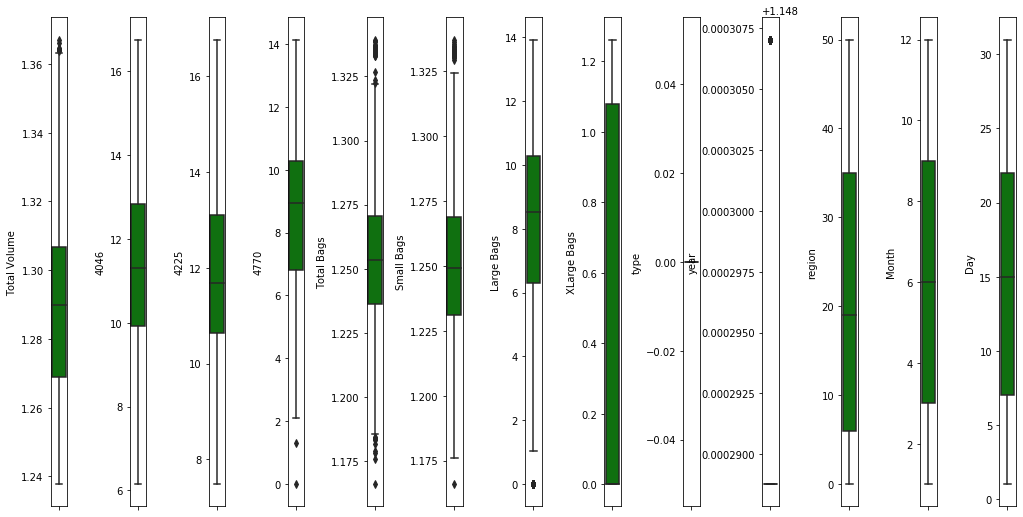

In [207]:
plt.figure(figsize=(17,70))     
for i in range(1,len(collist)): 
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [208]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.0,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.290329,11.216036,11.871686,8.557664,1.255387,1.250895,7.848268,0.491742,0.0,1.148292,21.196440,6.362558,15.253790
std,0.188891,0.027405,2.337126,1.703644,2.575991,0.030793,0.031644,3.417046,0.530829,0.0,0.000007,16.132398,3.472146,8.965902
min,0.490000,1.237788,6.150006,7.487045,0.000000,1.165923,1.165923,0.000000,0.000000,0.0,1.148289,0.000000,1.000000,1.000000
25%,0.980000,1.269012,9.923356,10.632896,6.815914,1.236079,1.231040,6.294786,0.000000,0.0,1.148289,6.000000,3.000000,7.000000
50%,1.080000,1.289875,11.311448,11.684067,8.947568,1.253443,1.249418,8.526222,0.000000,0.0,1.148289,19.000000,6.000000,15.000000
75%,1.190000,1.306831,12.841536,13.092216,10.280838,1.270456,1.268823,10.284273,1.080304,0.0,1.148289,35.000000,9.000000,22.000000
max,1.680000,1.367096,16.756419,16.757656,14.138693,1.339409,1.337304,13.929801,1.262133,0.0,1.148307,50.000000,12.000000,31.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025378EFAA88>,
      dtype=object)

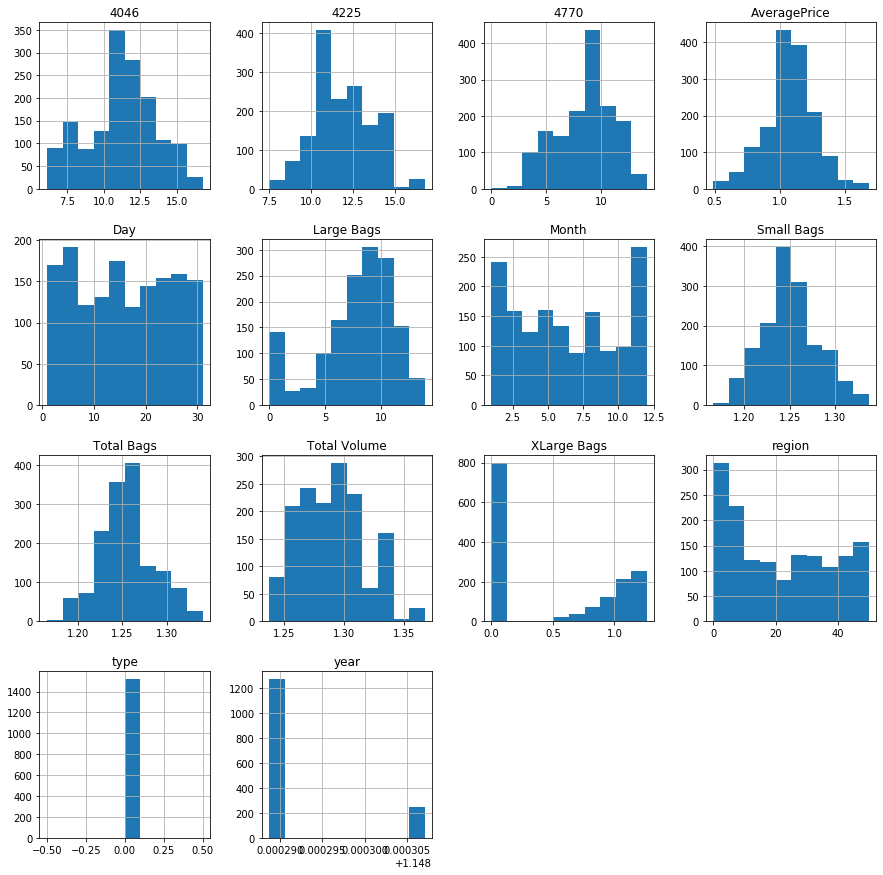

In [209]:
df1.hist(figsize=(15,15))  

In [210]:
df1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.332684,-0.511040,-0.129466,-0.289056,-0.194002,-0.151665,-0.214802,-0.080425,NaN,0.178683,-0.229408,0.060642,0.092589
Total Volume,-0.332684,1.000000,0.765850,0.887140,0.633957,0.927739,0.913517,0.585272,0.350008,NaN,-0.002263,0.189538,-0.072726,-0.050642
4046,-0.511040,0.765850,1.000000,0.456283,0.584634,0.646110,0.611015,0.522558,0.282617,NaN,-0.124610,0.324688,-0.067074,-0.037744
4225,-0.129466,0.887140,0.456283,1.000000,0.552522,0.832846,0.842103,0.453820,0.313593,NaN,0.005161,0.134603,-0.043650,-0.047734
4770,-0.289056,0.633957,0.584634,0.552522,1.000000,0.569365,0.581791,0.361404,0.509412,NaN,0.004865,0.052908,-0.020798,0.001779
Total Bags,-0.194002,0.927739,0.646110,0.832846,0.569365,1.000000,0.982529,0.594498,0.406430,NaN,0.134829,0.155753,-0.056280,-0.034710
Small Bags,-0.151665,0.913517,0.611015,0.842103,0.581791,0.982529,1.000000,0.491032,0.392218,NaN,0.166083,0.142318,-0.061846,-0.028143
Large Bags,-0.214802,0.585272,0.522558,0.453820,0.361404,0.594498,0.491032,1.000000,0.254428,NaN,-0.112991,0.084499,-0.038081,-0.037542
XLarge Bags,-0.080425,0.350008,0.282617,0.313593,0.509412,0.406430,0.392218,0.254428,1.000000,NaN,0.150768,-0.148021,0.071917,0.031125
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


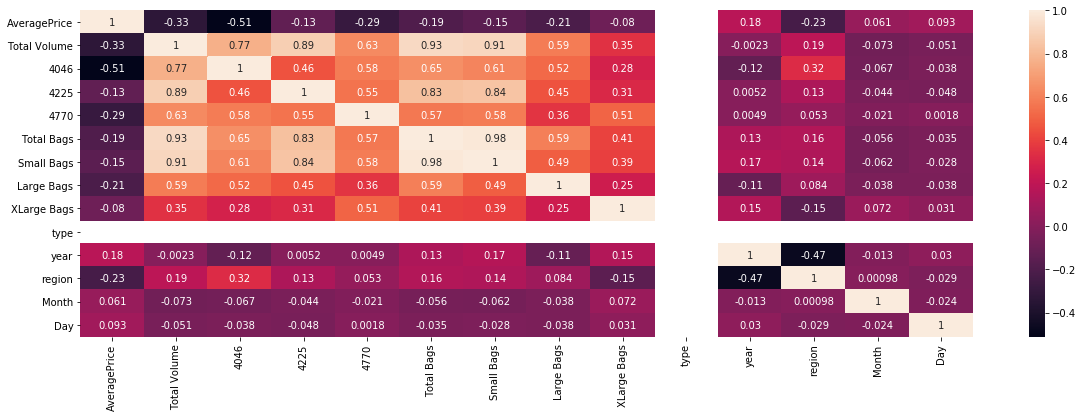

In [211]:
plt.figure(figsize=(20,6))
sns.heatmap(df1.corr(),annot=True)  

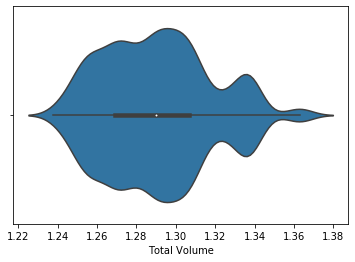

In [212]:
sns.violinplot(df1['Total Volume'])

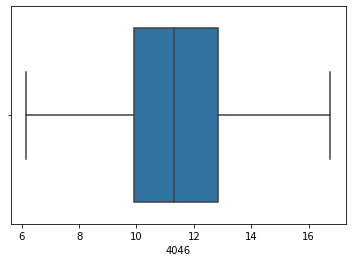

In [213]:
sns.boxplot(df1['4046'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2534e39bd88>,
 'caps': [<matplotlib.lines.Line2D at 0x2534e367408>,
 'boxes': [<matplotlib.lines.Line2D at 0x2534e3951c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2534e4301c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2534e430c88>],
 'means': []}

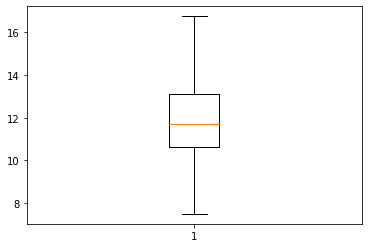

In [214]:
plt.boxplot(df1['4225'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2534e4830c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2534e483788>,
 'boxes': [<matplotlib.lines.Line2D at 0x2534e452e48>],
 'medians': [<matplotlib.lines.Line2D at 0x2534e45d148>],
 'fliers': [<matplotlib.lines.Line2D at 0x2534e2db608>],
 'means': []}

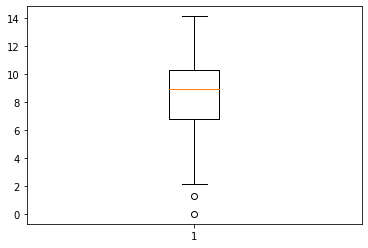

In [215]:
plt.boxplot(df1['4770'])

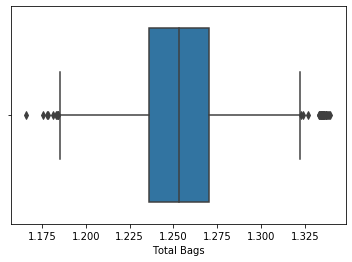

In [216]:
sns.boxplot(df1['Total Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x25378db8348>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x25378da6fc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x25378db8688>,
 'cbars': <matplotlib.collections.LineCollection at 0x25378da5a88>}

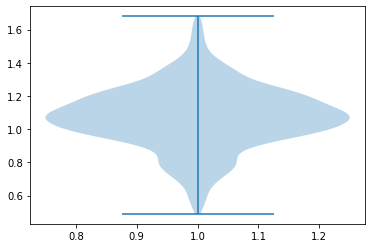

In [217]:
plt.violinplot(df1['AveragePrice'])

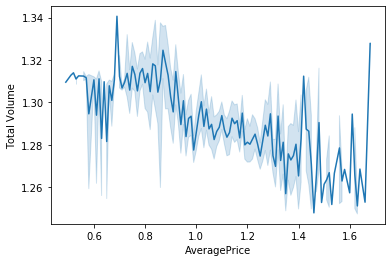

In [218]:
sns.lineplot(x='AveragePrice', y='Total Volume', data=df1) 

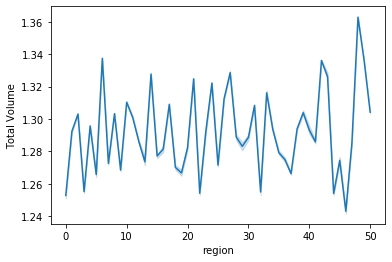

In [219]:
sns.lineplot(x='region', y='Total Volume', data=df1) 

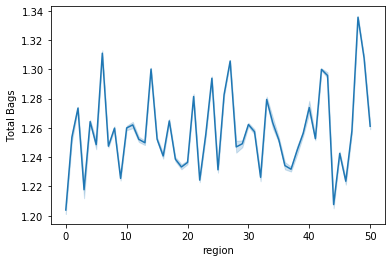

In [220]:
sns.lineplot(x='region', y='Total Bags', data=df1) 

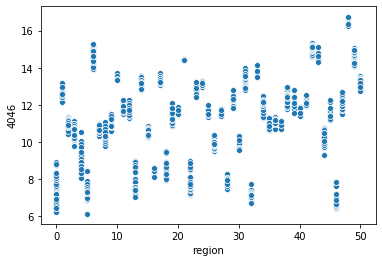

In [221]:
sns.scatterplot(x='region', y='4046', data=df1) 

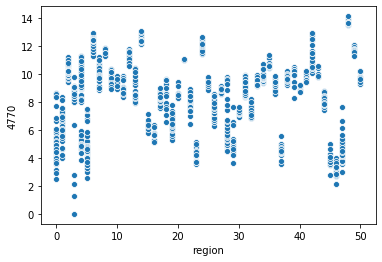

In [222]:
sns.scatterplot(x='region', y='4770', data=df1) 

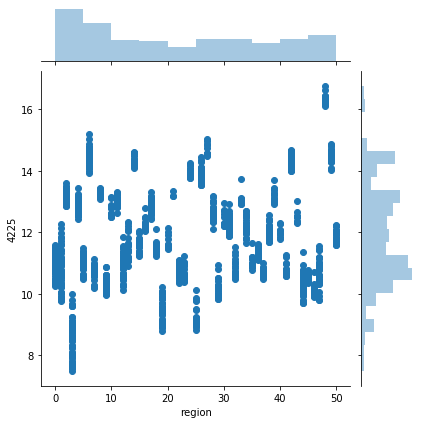

In [223]:
sns.jointplot(x='region', y='4225', data=df1) 

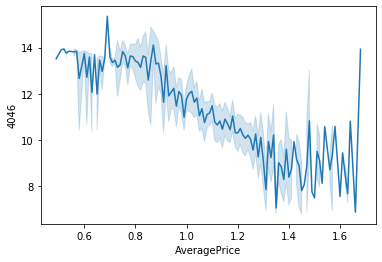

In [224]:
sns.lineplot(x='AveragePrice', y='4046', data=df1) 

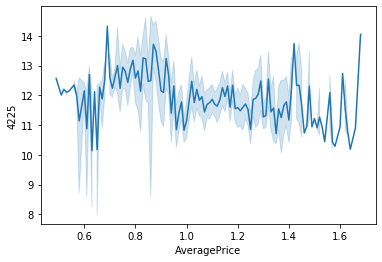

In [225]:
sns.lineplot(x='AveragePrice', y='4225', data=df1) 

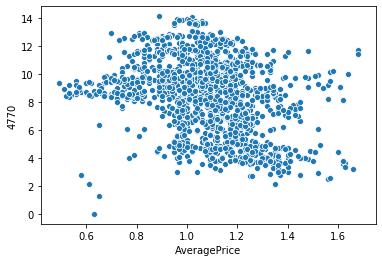

In [226]:
sns.scatterplot(x='AveragePrice', y='4770', data=df1) 

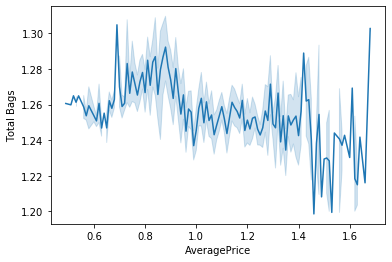

In [227]:
sns.lineplot(x='AveragePrice', y='Total Bags', data=df1) 

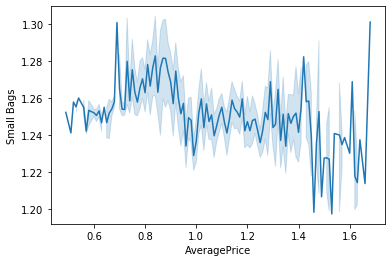

In [228]:
sns.lineplot(x='AveragePrice', y='Small Bags', data=df1) 

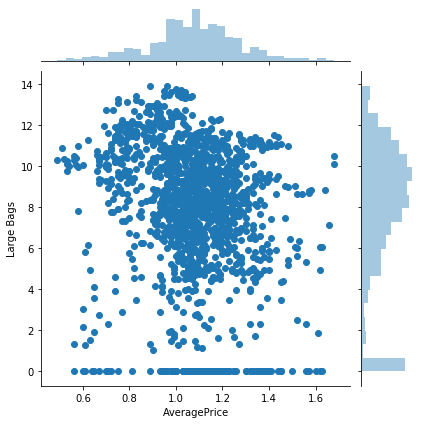

In [229]:
sns.jointplot(x='AveragePrice', y='Large Bags', data=df1) 

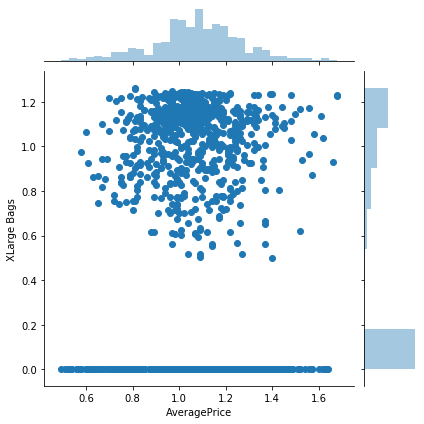

In [230]:
sns.jointplot(x='AveragePrice', y='XLarge Bags', data=df1) 

In [231]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,1.250117,6.944801,10.905146,3.895080,1.196840,1.196517,4.545951,0.000000,0,1.148289,0,12,27
1,1.35,1.246348,6.515127,10.706381,4.083115,1.199493,1.199187,4.589955,0.000000,0,1.148289,0,12,20
2,0.93,1.264141,6.679222,11.600485,4.879007,1.194867,1.194481,4.645736,0.000000,0,1.148289,0,12,13
3,1.08,1.254971,7.032624,11.184108,4.298373,1.184420,1.183682,4.903495,0.000000,0,1.148289,0,6,12
4,1.28,1.244591,6.848515,10.688288,4.340944,1.186379,1.185358,5.291746,0.000000,0,1.148289,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,1.274559,10.960064,10.939651,9.771828,1.248259,1.243509,9.245288,1.054186,0,1.148307,7,10,16
1513,1.51,1.273102,10.676528,10.862658,9.874088,1.249768,1.246272,9.059234,0.000000,0,1.148307,7,9,10
1514,1.48,1.273123,10.744316,10.876052,9.725432,1.249434,1.245658,9.019078,1.112966,0,1.148307,7,2,10
1515,1.47,1.274367,10.898807,10.889203,9.769752,1.250004,1.246687,9.021509,0.000000,0,1.148307,7,9,25


In [232]:
x=df1.drop('region',axis=1)
x.head() 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,1.250117,6.944801,10.905146,3.895080,1.196840,1.196517,4.545951,0.0,0,1.148289,12,27
1,1.35,1.246348,6.515127,10.706381,4.083115,1.199493,1.199187,4.589955,0.0,0,1.148289,12,20
2,0.93,1.264141,6.679222,11.600485,4.879007,1.194867,1.194481,4.645736,0.0,0,1.148289,12,13
3,1.08,1.254971,7.032624,11.184108,4.298373,1.184420,1.183682,4.903495,0.0,0,1.148289,6,12
4,1.28,1.244591,6.848515,10.688288,4.340944,1.186379,1.185358,5.291746,0.0,0,1.148289,11,29


In [233]:
y=pd.DataFrame(df1.region)
y.head()

,region
0,0
1,0
2,0
3,0
4,0


In [234]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [236]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=80,test_size=0.20)

In [237]:
print(train_x.shape,test_x.shape)

(1213, 13) (304, 13)


In [238]:
print(train_y.shape,test_y.shape)

(1213, 1) (304, 1)


In [239]:
kn=KNeighborsClassifier(n_neighbors=3) 
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for KNeighborsClassifier= ',AS)

Accuracy_score for KNeighborsClassifier=  0.3881578947368421


In [240]:
sv=SVC(C=10,kernel='poly') 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for SVC= ',AS)

Accuracy_score for SVC=  0.8848684210526315


In [241]:
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for DTC= ',AS) 

Accuracy_score for DTC=  0.9111842105263158


In [242]:
rfc=RandomForestClassifier(criterion='entropy',n_estimators=1000) 
rfc.fit(train_x,train_y)
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for rfc= ',AS)

Accuracy_score for rfc=  0.9539473684210527


In [243]:
mnb=MultinomialNB(alpha=0.1,fit_prior=True)
mnb.fit(train_x,train_y)
pre=mnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for MNB= ',AS)

Accuracy_score for MNB=  0.22697368421052633


In [244]:
adc=AdaBoostClassifier(base_estimator=sv,learning_rate=0.01,n_estimators=1000,algorithm='SAMME')
adc.fit(train_x,train_y)
pre=adc.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score for adc= ',AS)

Accuracy_score for adc=  0.09868421052631579


In [245]:
xgb=XGBClassifier(alpha=0.01, max_depth=6)
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score for xgb= ',AS)

Accuracy_score for xgb=  0.9111842105263158


In [246]:
# Here RandomForestClassifier is working best so I am saving the model 

In [272]:
from sklearn.externals import joblib
joblib.dump(rfc, 'rfc_avocado_region.pkl')

['rfc_avocado_region.pkl']

# Finding out the Predictions for AveragePrice

In [247]:
df1.skew()

AveragePrice   -0.109444
Total Volume    0.383704
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.274385
Small Bags      0.323187
Large Bags     -0.912766
XLarge Bags     0.227093
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [248]:
x=df1.drop('AveragePrice',axis=1)
x.head() 

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.250117,6.944801,10.905146,3.895080,1.196840,1.196517,4.545951,0.0,0,1.148289,0,12,27
1,1.246348,6.515127,10.706381,4.083115,1.199493,1.199187,4.589955,0.0,0,1.148289,0,12,20
2,1.264141,6.679222,11.600485,4.879007,1.194867,1.194481,4.645736,0.0,0,1.148289,0,12,13
3,1.254971,7.032624,11.184108,4.298373,1.184420,1.183682,4.903495,0.0,0,1.148289,0,6,12
4,1.244591,6.848515,10.688288,4.340944,1.186379,1.185358,5.291746,0.0,0,1.148289,0,11,29


In [249]:
y=pd.DataFrame(df1.AveragePrice)
y.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [250]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

In [251]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42 is 0.37396272101838
r2 score corresponding to  43 is 0.4183175846866435
r2 score corresponding to  44 is 0.3503095077356313
r2 score corresponding to  45 is 0.3225048386250554
r2 score corresponding to  46 is 0.39270876773774877
r2 score corresponding to  47 is 0.3670291218511085
r2 score corresponding to  48 is 0.37240584412414046
r2 score corresponding to  49 is 0.34913841322732164
r2 score corresponding to  50 is 0.3194031230265827
r2 score corresponding to  51 is 0.3528907956859182
r2 score corresponding to  52 is 0.3536131413364664
r2 score corresponding to  53 is 0.37673311072297555
r2 score corresponding to  54 is 0.4146955480373604
r2 score corresponding to  55 is 0.4258869633025577
r2 score corresponding to  56 is 0.23199743896448755
r2 score corresponding to  57 is 0.349582206458635
r2 score corresponding to  58 is 0.29771431154708117
r2 score corresponding to  59 is 0.385743104803977
r2 score corresponding to  60 is 0.4036215112359931
r2 score c

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,5)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,y) 
gknr.best_params_

{'n_neighbors': 4}

In [253]:
knr=KNeighborsRegressor(n_neighbors=3) 
r_state=maxr2_score(knr,x,y) 

r2 score corresponding to  42 is 0.5409187639896347
r2 score corresponding to  43 is 0.5577660033836063
r2 score corresponding to  44 is 0.5532029713174629
r2 score corresponding to  45 is 0.5644909345926823
r2 score corresponding to  46 is 0.5718409708111412
r2 score corresponding to  47 is 0.6019886223228861
r2 score corresponding to  48 is 0.4781727403344823
r2 score corresponding to  49 is 0.48344134881401424
r2 score corresponding to  50 is 0.513671613558176
r2 score corresponding to  51 is 0.513930768559351
r2 score corresponding to  52 is 0.5481981502953744
r2 score corresponding to  53 is 0.5652527006928434
r2 score corresponding to  54 is 0.5816458448031483
r2 score corresponding to  55 is 0.6104646310676776
r2 score corresponding to  56 is 0.4763485450428673
r2 score corresponding to  57 is 0.5815168212877173
r2 score corresponding to  58 is 0.4616705969691105
r2 score corresponding to  59 is 0.5910844705749195
r2 score corresponding to  60 is 0.5951679016525669
r2 score corr

In [254]:
from sklearn.model_selection import cross_val_score 
print('Mean r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Linear Regression: ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression: ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression: ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Linear Regression:  0.1116121144193353
Standard Deviation in r2 score for Linear Regression:  0.12253652486906598

Mean r2 score for KNN Regression:  -0.5607614527752307
Standard Deviation in r2 score for KNN Regression:  0.6706047517704772


In [255]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
g_lsreg = GridSearchCV(lsreg, parameters, cv=5)
g_lsreg.fit(x,y)
g_lsreg.best_params_

{'alpha': 0.1}

In [256]:
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  42 is 0.2982171979903727
r2 score corresponding to  43 is 0.3253386749262772
r2 score corresponding to  44 is 0.23278788339184553
r2 score corresponding to  45 is 0.2315501985782824
r2 score corresponding to  46 is 0.3206297398715493
r2 score corresponding to  47 is 0.28137265290977087
r2 score corresponding to  48 is 0.23398958910696221
r2 score corresponding to  49 is 0.2653942271354153
r2 score corresponding to  50 is 0.3098550437380818
r2 score corresponding to  51 is 0.2712539039873436
r2 score corresponding to  52 is 0.2750624281766322
r2 score corresponding to  53 is 0.28983043194804536
r2 score corresponding to  54 is 0.273876499340599
r2 score corresponding to  55 is 0.29877402748682325
r2 score corresponding to  56 is 0.21763941043314683
r2 score corresponding to  57 is 0.2558106373181862
r2 score corresponding to  58 is 0.21478978577608
r2 score corresponding to  59 is 0.3024817685686514
r2 score corresponding to  60 is 0.27708362669704933
r2 score

In [257]:
print('Mean r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Lasso Regression: ',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for Lasso Regression:  0.04900339055192093
Standard Deviation in r2 score for Lasso Regression:  0.158582539304926


In [258]:
from sklearn.linear_model import Ridge
rireg=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
g_rireg = GridSearchCV(rireg, parameters, cv=5)
g_rireg.fit(x,y)
g_rireg.best_params_

{'alpha': 0.0001}

In [259]:
rireg=Ridge(alpha=1)
r_state=maxr2_score(rireg,x,y) 

r2 score corresponding to  42 is 0.31197240338128984
r2 score corresponding to  43 is 0.3502337878120477
r2 score corresponding to  44 is 0.2430662499767966
r2 score corresponding to  45 is 0.2321409636951831
r2 score corresponding to  46 is 0.3274549272826548
r2 score corresponding to  47 is 0.30716753614736225
r2 score corresponding to  48 is 0.25127981798661614
r2 score corresponding to  49 is 0.27808361355694866
r2 score corresponding to  50 is 0.31785357494572863
r2 score corresponding to  51 is 0.28489201581538615
r2 score corresponding to  52 is 0.29671076993260825
r2 score corresponding to  53 is 0.3099042008843369
r2 score corresponding to  54 is 0.29259244117329464
r2 score corresponding to  55 is 0.30671046161121895
r2 score corresponding to  56 is 0.2307210299034228
r2 score corresponding to  57 is 0.28046856505861995
r2 score corresponding to  58 is 0.2275449250332181
r2 score corresponding to  59 is 0.3189570550623243
r2 score corresponding to  60 is 0.2994602152240019
r2

In [260]:
print('Mean r2 score for Ridge Regression: ',cross_val_score(rireg,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Ridge Regression: ',cross_val_score(rireg,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for Ridge Regression:  0.011091994182776843
Standard Deviation in r2 score for Ridge Regression:  0.1831226979798408


In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]} 
g_enr = GridSearchCV(enr, parameters, cv=5)
g_enr.fit(x,y)
g_enr.best_params_

{'alpha': 0.1}

In [262]:
enr=ElasticNet(alpha=0.1)
r_state=maxr2_score(enr,x,y) 

r2 score corresponding to  42 is 0.26145386397992587
r2 score corresponding to  43 is 0.27673997289930186
r2 score corresponding to  44 is 0.23183008423328133
r2 score corresponding to  45 is 0.22108725448248445
r2 score corresponding to  46 is 0.2943709026799304
r2 score corresponding to  47 is 0.2532676141927007
r2 score corresponding to  48 is 0.2264395631215227
r2 score corresponding to  49 is 0.24407187614785597
r2 score corresponding to  50 is 0.27663336722822185
r2 score corresponding to  51 is 0.24244631767638702
r2 score corresponding to  52 is 0.24284809405652164
r2 score corresponding to  53 is 0.2557742989482741
r2 score corresponding to  54 is 0.24783767597779538
r2 score corresponding to  55 is 0.2692794078202172
r2 score corresponding to  56 is 0.21490526406953647
r2 score corresponding to  57 is 0.22764439438707718
r2 score corresponding to  58 is 0.20536040837776226
r2 score corresponding to  59 is 0.27386527726600474
r2 score corresponding to  60 is 0.2580176955884909

In [263]:
print('Mean r2 score for ElasticNet Regression: ',cross_val_score(enr,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for ElasticNet Regression: ',cross_val_score(enr,x,y,cv=5,scoring='r2').std()) 

Mean r2 score for ElasticNet Regression:  0.1334718373557471
Standard Deviation in r2 score for ElasticNet Regression:  0.0767497677910417


In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
parameters= {'criterion':['mse', 'mae'], 'splitter':['best','random'], 'random_state':[0,100]}
gdtr = GridSearchCV(dtr, parameters, cv=5)
gdtr.fit(x,y)
gdtr.best_params_ 

{'criterion': 'mse', 'random_state': 0, 'splitter': 'random'}

In [266]:
dtr=DecisionTreeRegressor(criterion='mae',random_state=0,splitter='random') 
r_state=maxr2_score(dtr,x,y)   

r2 score corresponding to  42 is 0.5857686014034033
r2 score corresponding to  43 is 0.4151460853158686
r2 score corresponding to  44 is 0.629892732906685
r2 score corresponding to  45 is 0.6811357795729143
r2 score corresponding to  46 is 0.5757082215970738
r2 score corresponding to  47 is 0.6948049015854585
r2 score corresponding to  48 is 0.6222406791925484
r2 score corresponding to  49 is 0.6834166094023295
r2 score corresponding to  50 is 0.6796665464873943
r2 score corresponding to  51 is 0.750266339992228
r2 score corresponding to  52 is 0.7102989590397668
r2 score corresponding to  53 is 0.6705957770820575
r2 score corresponding to  54 is 0.6670600877000344
r2 score corresponding to  55 is 0.6849689432684389
r2 score corresponding to  56 is 0.5312818573580483
r2 score corresponding to  57 is 0.5858035628010728
r2 score corresponding to  58 is 0.6305432149555747
r2 score corresponding to  59 is 0.7082451060894057
r2 score corresponding to  60 is 0.6540995961117619
r2 score corre

In [267]:
print('Mean r2 score for Decision Tree Regressor: ',cross_val_score(dtr,x,y,cv=5,scoring='r2').mean()) 
print('Standard Deviation in r2 score for Decision Tree Regressor: ',cross_val_score(dtr,x,y,cv=5,scoring='r2').std())  

Mean r2 score for Decision Tree Regressor:  -0.800358251073947
Standard Deviation in r2 score for Decision Tree Regressor:  1.0393350966237886


In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
parameters= {'criterion':['mse', 'mae'], 'random_state':[0,100]} 
grfr = GridSearchCV(rfr, parameters, cv=5)
grfr.fit(x,y)
grfr.best_params_ 

{'criterion': 'mae', 'random_state': 100}

In [270]:
rfr=RandomForestRegressor(criterion='mae',random_state=100) 
r_state=maxr2_score(rfr,x,y)  

r2 score corresponding to  42 is 0.8028987520482909
r2 score corresponding to  43 is 0.8344480680268684
r2 score corresponding to  44 is 0.8066000759308292
r2 score corresponding to  45 is 0.7890707115657493
r2 score corresponding to  46 is 0.8160659070559815
r2 score corresponding to  47 is 0.832106693533424
r2 score corresponding to  48 is 0.8023341011626297
r2 score corresponding to  49 is 0.79918932900575
r2 score corresponding to  50 is 0.7789050352183894
r2 score corresponding to  51 is 0.8013158340306827
r2 score corresponding to  52 is 0.7801130215615577
r2 score corresponding to  53 is 0.8060309373259439
r2 score corresponding to  54 is 0.8031475702335705
r2 score corresponding to  55 is 0.8209120701009585
r2 score corresponding to  56 is 0.7548899960041866
r2 score corresponding to  57 is 0.8036658220494168
r2 score corresponding to  58 is 0.7854685322702857
r2 score corresponding to  59 is 0.8015814980767213
r2 score corresponding to  60 is 0.8504269352762268
r2 score corres

In [ ]:
# Here I see RandomForestRegressor is working best so I save the model

In [271]:
from sklearn.externals import joblib
joblib.dump(rfr, 'rfr_avocado_price.pkl')

['rfr_avocado_price.pkl']